## Assignment-4 : Fourier Series approximation using Linear Regression

In [292]:
import numpy as np
import math
from scipy.integrate import quad 
import timeit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Function Definitions
The functions $e^x$ and $cos(cos(x))$ are defined below :

In [293]:
def exp(x):
    return np.exp(x)

In [294]:
def coscos(x) :
    return np.cos(np.cos(x))

## Visualization


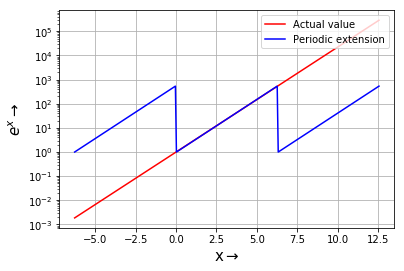

In [295]:
# for e^x
x = np.linspace(-2*np.pi,4*np.pi,300)
x1=np.linspace(0,2*pi,100)
tiled =tile(x1,3)
#x = x[:-1]
exp_x = exp(x)
coscos_x = coscos(x)
pylab.semilogy(x,exp_x,'r',label='Actual value')
pylab.semilogy(x,exp(tiled),'-b',label='Periodic extension')
pylab.grid(True)
pylab.ylabel(r'$e^{x}\rightarrow$',fontsize=15)
pylab.xlabel(r'x$\rightarrow$',fontsize=15)
#pylab.title('Semilog plot of $e^{x}$',fontsize=15)
pylab.legend(loc='upper right')

Text(0.5,1,'Plot of $\\cos(\\cos(x))$')

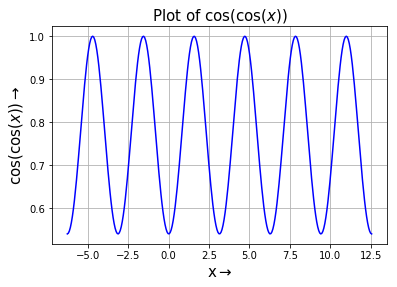

In [296]:
# for cos(cos(x))
pylab.plot(x,coscos_x,'b')
pylab.grid(True)
pylab.xlabel(r'x$\rightarrow$',fontsize=15)
pylab.ylabel(r'$\cos(\cos(x))\rightarrow$',fontsize=15)
pylab.title('Plot of $\cos(\cos(x))$',fontsize=15)

## Finding the Fourier series coefficients
The following code block evaluates the first $n$ coefficients of the input function :

In [297]:
func_dict = {'exp(x)':exp,'cos(cos(x))': coscos}
def find_coeff(n,label):
    coeff = np.zeros(n)
    func = func_dict[label]
    u = lambda x,k: func(x)*np.cos(k*x)
    v = lambda x,k: func(x)*np.sin(k*x)
    coeff[0]= quad(func,0,2*pi)[0]/(2*np.pi)
    for i in range(1,n,2): 
        coeff[i] = quad(u,0,2*pi,args=((i+1)/2))[0]/np.pi
    for i in range(2,n,2):
        coeff[i] = quad(v,0,2*pi,args=(i/2))[0]/np.pi
    return coeff

## Evaluation for $e^x$ and $cos(cos(x))$  
The function is used to evaluate the coefficients for $e^x$ and $cos(cos(x))$. Runtime is calculated for comparison with the least squares method.

In [298]:
start = timeit.default_timer()
coeff_exp = find_coeff(51,'exp(x)')
elapsed = timeit.default_timer() - start
print(elapsed)

0.06532022601459175


In [299]:
coeff_cos = find_coeff(51,'cos(cos(x))')

Semilog and Loglog plot of the coefficients

Text(0.5,1,'Semilog Plot of coefficients for $e^{x}$')

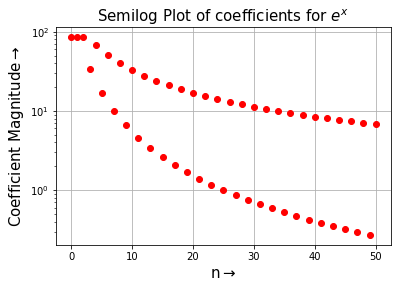

In [300]:
pylab.semilogy(range(51),np.abs(coeff_exp),'ro')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)
pylab.title('Semilog Plot of coefficients for $e^{x}$',fontsize=15)

Text(0.5,1,'Loglog Plot of coefficients of $e^{x}$')

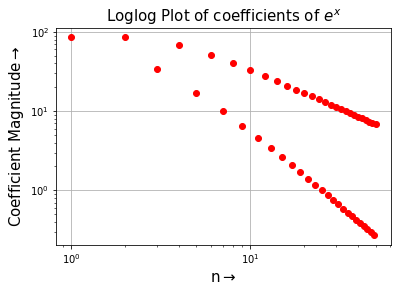

In [301]:
pylab.loglog(range(51),np.abs(coeff_exp),'ro')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)
pylab.title('Loglog Plot of coefficients of $e^{x}$',fontsize=15)

Text(0.5,1,'Semilog Plot of coefficients for $cos(cos(x))$')

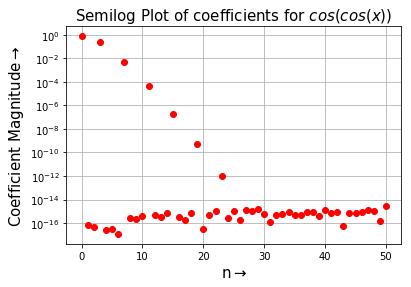

In [302]:
pylab.semilogy(range(51),abs(coeff_cos),'ro')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)
pylab.title('Semilog Plot of coefficients for $cos(cos(x))$',fontsize=15)

Text(0.5,1,'Loglog Plot of coefficients of $cos(cos(x))$')

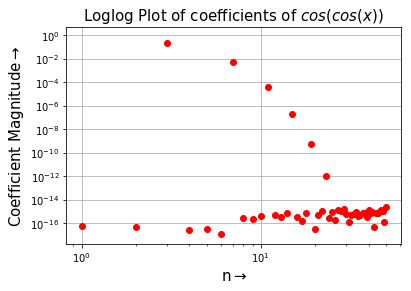

In [303]:
pylab.loglog(range(51),abs(coeff_cos),'ro')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)
pylab.title('Loglog Plot of coefficients of $cos(cos(x))$',fontsize=15)

## Least Squares method
The following code snippet evaluates the coefficients using the least squares method.Runtime is found to be 10 times less than the direct integration approach.

In [304]:
x = np.linspace(0,2*pi,401)
x = x[:-1]
y = np.linspace(0,2*pi,400)
A = np.zeros((400,51))
A[:,0] = 1
start = timeit.default_timer()
for i in range(1,26):
    A[:,2*i-1] = cos(i*x)
    A[:,2*i] = sin(i*x) 
B_exp = exp(x)  
B_coscos = coscos(x)
c_exp = lstsq(A,B_exp)[0]
print(timeit.default_timer()-start)

0.004748256993480027


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


In [305]:
c_cos = lstsq(A,B_coscos)[0]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Plots comparing the coefficients obtained with different approaches

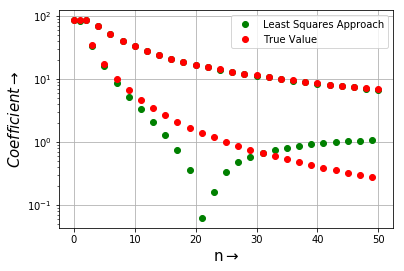

In [306]:
pylab.semilogy(range(51),np.abs(c_exp),'go',label='Least Squares Approach')
pylab.semilogy(range(51),np.abs(coeff_exp),'ro',label='True Value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)
#pylab.title('Semilog Plot of coefficients for $e^{x}$',fontsize=15)
pylab.legend(loc='upper right')

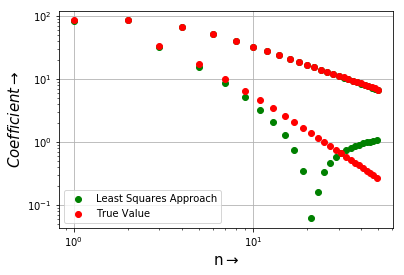

In [307]:
pylab.loglog(range(51),np.abs(c_exp),'go',label='Least Squares Approach')
pylab.loglog(range(51),np.abs(coeff_exp),'ro',label = 'True Value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)
#pylab.title('Loglog Plot of coefficients of $e^{x}$',fontsize=15)
pylab.legend(loc='lower left')

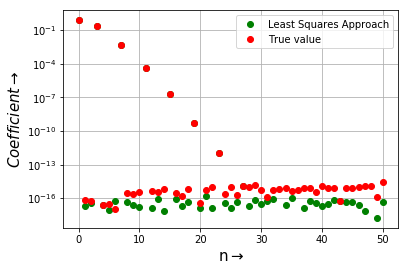

In [308]:
pylab.semilogy(range(51),abs(c_cos),'go',label="Least Squares Approach")
pylab.semilogy(range(51),abs(coeff_cos),'ro',label='True value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)
#pylab.title('Semilog Plot of coefficients for $cos(cos(x))$',fontsize=15)
pylab.legend(loc='upper right')

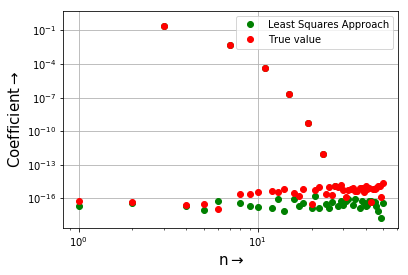

In [309]:
pylab.loglog(range(51),abs(c_cos),'go',label="Least Squares Approach")
pylab.loglog(range(51),abs(coeff_cos),'ro',label='True value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'Coefficient$\rightarrow$',fontsize=15)
#pylab.title('Loglog Plot of coefficients of $cos(cos(x))$',fontsize=15)
pylab.legend(loc='upper right')

## Calculating the deviation

In [310]:
dev_exp = abs(coeff_exp - c_exp)
dev_cos = abs(coeff_cos - c_cos)

In [311]:
max_dev_exp = np.max(dev_exp)
max_dev_cos = np.max(dev_cos)
print(max_dev_exp)
print(max_dev_cos)

1.332730870335368
2.553315730564766e-15


The following plots compare the function values obtained by the least squares method with the true value.

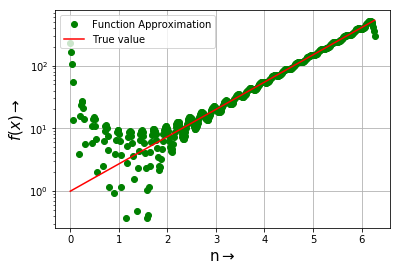

In [312]:
approx_exp = np.matmul(A,c_exp)
approx_coscos = np.matmul(A,c_cos)
pylab.semilogy(x,approx_exp,'go',label="Function Approximation")
pylab.semilogy(x,exp(x),'-r',label='True value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'$f(x)\rightarrow$',fontsize=15)
#pylab.title('Plot of $e^{x}$ and its Fourier series approximation',fontsize=15)
pylab.legend(loc='upper left')

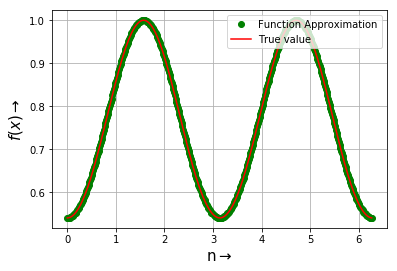

In [313]:
pylab.plot(x,approx_coscos,'go',label="Function Approximation")
pylab.plot(x,coscos(x),'-r',label='True value')
pylab.grid(True)
pylab.xlabel(r'n$\rightarrow$',fontsize=15)
pylab.ylabel(r'$f(x)\rightarrow$',fontsize=15)
#pylab.title('Plot of $cos(cos(x))$ and its Fourier series approximation',fontsize=15)
pylab.legend(loc='upper right')